In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout

In [3]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D,AveragePooling2D


In [4]:
from tensorflow.keras.optimizers import Adam

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import listdir
from os.path import isfile,join
from PIL import Image
import glob

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
model=Sequential()
model.add(Conv2D(filters=6,
                kernel_size=5,
                strides=1,
                 activation="relu",
                input_shape=(170,170,3)))
model.add(AveragePooling2D(pool_size=(2,2)))

In [8]:
model.add(Conv2D(filters=16,
                kernel_size=5,
                strides=1,
                 activation="relu",
                input_shape=(100,100,3)))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=16,activation='relu'))
model.add(Dense(units=6,activation='softmax'))
model.compile(optimizer='adam',loss=['categorical_crossentropy'],metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 166, 166, 6)       456       
_________________________________________________________________
average_pooling2d (AveragePo (None, 83, 83, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 79, 79, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 39, 39, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 24336)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                778784    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                5

In [9]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [10]:
training_set=train_datagen.flow_from_directory('dataset1/train',target_size=(170,170),batch_size=32,class_mode="categorical")
test_set=test_datagen.flow_from_directory('dataset1/test',target_size=(170,170),batch_size=32,class_mode="categorical")

Found 3370 images belonging to 6 classes.
Found 739 images belonging to 6 classes.


In [11]:
epochs=75
batch_size=32

In [12]:
history=model.fit_generator(training_set,steps_per_epoch=training_set.samples//batch_size,epochs=epochs,validation_data=
                           test_set,validation_steps=test_set.samples//batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 105 steps, validate for 23 steps
Epoch 1/75
105/105 [==============================] - 132s 1s/step - loss: 1.1259 - accuracy: 0.5123 - val_loss: 0.8620 - val_accuracy: 0.6427
Epoch 2/75
105/105 [==============================] - 126s 1s/step - loss: 0.9559 - accuracy: 0.5992 - val_loss: 0.7768 - val_accuracy: 0.6889
Epoch 3/75
105/105 [==============================] - 123s 1s/step - loss: 0.8732 - accuracy: 0.6327 - val_loss: 0.7073 - val_accuracy: 0.6916
Epoch 4/75
105/105 [==============================] - 123s 1s/step - loss: 0.8552 - accuracy: 0.6318 - val_loss: 0.7483 - val_accuracy: 0.6739
Epoch 5/75
105/105 [==============================] - 123s 1s/step - loss: 0.8176 - accuracy: 0.6525 - val_loss: 0.7375 - val_accuracy: 0.6834
Epoch 6/75
105/105 [==============================] - 124s 1s/step - loss: 0.7607 - accuracy: 0.6732 - val_loss: 0.6

In [29]:
def graph():
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Test'], loc = 'Upperleft')
    plt.show()
    
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Test'], loc = 'Upperleft')
    plt.show()


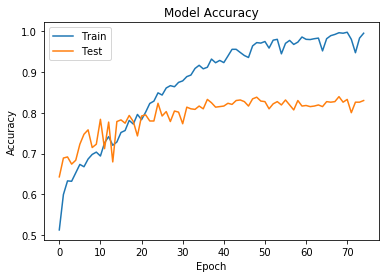

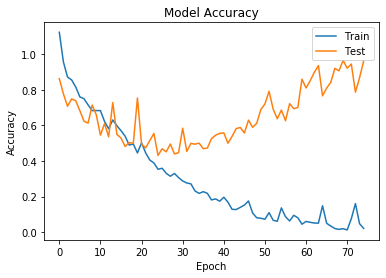

In [30]:
graph()

In [31]:
import h5py
model.save('skin2.h5')

In [32]:
import tensorflow

In [33]:
from tensorflow.keras.models import load_model

In [34]:
from tensorflow.keras.preprocessing import image

In [35]:
test_image=image.load_img('mild.jpg',target_size=(170,170))

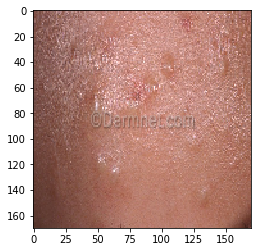

In [36]:
import matplotlib.pyplot as plt
img=plt.imshow(test_image)
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)

In [37]:
model=tensorflow.keras.models.load_model('skin2.h5')

In [38]:
result=model.predict(test_image)

In [39]:
prediction=result[0]
classes=training_set.class_indices

In [40]:
classes

{'Medium': 0, 'Mild': 1, 'Severe': 2, 'benign': 3, 'maligant': 4, 'normal': 5}

In [41]:
prediction=list(prediction)

In [42]:
prediction

[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]

In [43]:
classes = ['Medium', 'Mild', 'Severe', 'benign', 'malignant','normal']

In [44]:
output=dict(zip(classes,prediction))

In [45]:
output

{'Medium': 0.0,
 'Mild': 1.0,
 'Severe': 0.0,
 'benign': 0.0,
 'malignant': 0.0,
 'normal': 0.0}

In [46]:
if output['benign']==1.0:
    print('Benign')
if output['malignant']==1.0:
    print('Malignant')
if output['Medium']==1.0:
    print('Medium')
if output['Mild']==1.0:
    print('Mild')
if output['Severe']==1.0:
    print('Severe')
if output['normal']==1.0:
    print('normal')

Mild
